## Examples of samples for Various Methods of Control

### Setup for running notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
import os
import IPython

In [10]:
# make function to display all audios and specgrams

def get_sample_specs(root, prompt, control_method = "sobeldenoise"):
        
    fig, axs = plt.subplots(2, 2, figsize=(8,8))
    axs = np.ravel(axs)

    # draw control
    i = 0
    axs[i].axis('off')
    axs[i].imshow(cv2.imread(os.path.join(root, control_method, prompt+"_target.png")))
    axs[i].set_title(f"target")

    # draw control
    i = 1
    axs[i].axis('off')
    axs[i].imshow(cv2.imread(os.path.join(root, control_method, prompt+"_source.png")))
    axs[i].set_title(f"control")

    # draw sample
    i = 2
    axs[i].axis('off')
    axs[i].imshow(cv2.imread(os.path.join(root, control_method, prompt+"_samp_0.png")))
    axs[i].set_title(f"sample 0")

    i = 3
    axs[i].axis('off')
    axs[i].imshow(cv2.imread(os.path.join(root, control_method, prompt+"_samp_1.png")))
    axs[i].set_title(f"sample 1")

    plt.suptitle(f"Prompt: \"{prompt}\"")
    plt.tight_layout()
    plt.show()

### Control Methods

Testing 4 control mechanisms:
- Canny Edge Detection
- Full Spectrogram 
- Sobel Edge Detection
- Non-local Means Denoising followed by Sobel Edge Detection

For each, I trained a ControlNet on the same dataset for 9 hours (roughly 6 epochs).

### Dataset Info

Training dataset comprised of:
- 100 30-sec songs from dataset GTZAN (generating vocal melodies)
- 20 4 minute songs from SLAKH-18 subset (generating any set of stems). 

Total generated ~18,000 training examples. Example prompts shown below.

In [6]:
root = "../3 day train/sobeldenoise_72hr_samples"
prompt = "Generate a Grand Piano."
control_methods = ["sobeldenoise"]

files = os.listdir(root+"/sobeldenoise")
prompts = list(set([file.split(".")[0]+"." for file in files]))
prompts

['Given Grand Piano, Electric Bass, Drums, and Piano: Generate a Electric Guitar.',
 'Given Piano, Bass, Flute, Strings, Pan Flute, and Drums: Generate a Acoustic Guitar stem.',
 'Given Drums, Piano, Bass, and Grand Piano: Generate a Violin.',
 'Generate a Electric Guitar stem.',
 'Generate a Acoustic Guitar.',
 'Generate a Distortion Guitar part.',
 'Given Electric Bass and Drums: Generate a Tenor Sax stem.',
 'Generate a Alto Sax stem.',
 'Generate a Electric Guitar line.',
 'Given Piano, Bass, Acoustic Guitar, Strings, and Drums: Generate a Flute.',
 'Given Piano, Drums, Slap Bass, Bass, Strings, Brass instruments, and Acoustic Guitar: Generate a Trombone part.',
 'Generate a Clarinet line.',
 'Given Drums, Slap Bass, and Bass: Generate a Trombone stem.']

## Testing what we know already

How do control methods generate vocal melodies? 

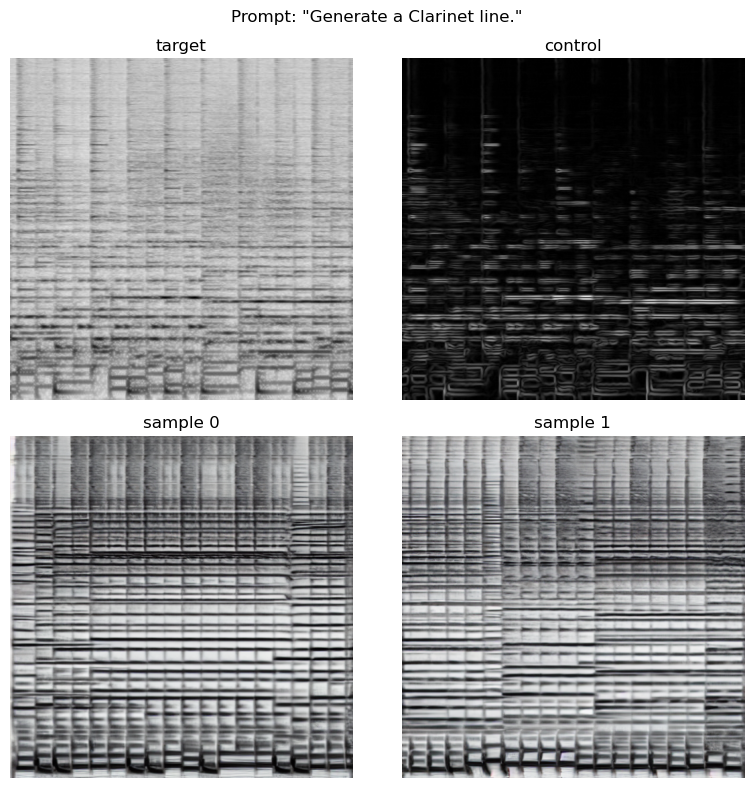

In [13]:
prompt = "Generate a Clarinet line."

get_sample_specs(root, prompt)